
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 1 - Local Search <br>
<font color=696880 size=4>
Ali Aghayari


____

# Personal Data

In [1]:
# Set your student number
student_number = '401106266'
Name = 'مهدی'
Last_Name = 'علی نژاد'

# Rules

<font color=red>
Please run all the cells.
</font>

# Libraries

In [2]:
!pip install tsp_solver2

In [3]:
# import libraries here
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import time
import itertools
from tsp_solver.greedy import solve_tsp


# Q1: TSP problem

## Problem Definition

Consider the Euclidean  [Traveling Salesperson Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem):</br>
- In this problem, we are considering a country with n cities that are randomly placed; our country is a 1000 by 1000 square; we want to find the shortest tour for this country using their coordinates.
- A tour is a cycle that passes each city precisely one time.
- In this notebook we will develop some solutions to the problem, and more generally show how to think about solving a problem like this.



## Problem Representation (20 Points)

 We want to create our problem structure and present some valuable methods in this part.
 - init: choose your problem structure and create the variables accordingly.
 - distance: take two cities and return the distance between them.
 - tour length: get a tour and return the length of the given tour.
 - The shortest tour: get a set of tours and return the shortest one.
 - plot tour: get a tour and plot tour of the country.
 - nearest_neighbor: get a semi-tour and return to the nearest city to the last element you have yet to visit.

In [62]:
class TSP:
    # TODO : cities, num cities, distances = ?
    r = random.Random()

    def __init__(self, num_cities, cities=None):
        self.cities = []
        self.num_cities = num_cities
        # TODO : if cities is None --> create randomly placed cities with respect to num_cities
        if cities is None:
            for i in range(num_cities):
                x = int(self.r.random() * 1000)
                y = int(self.r.random() * 1000)
                self.cities.append((x, y))
            return

        # TODO : else --> use the given data
        else:
            self.cities = cities
        # note : city axis values can be from 0 to 1000

    def get_distances(self):
        neighbor_matrix = []
        for i in range(self.num_cities):
            dist = []
            for j in range(self.num_cities):
                dist.append(self.distance(i, j))
            neighbor_matrix.append(dist)
        return neighbor_matrix

    def distance(self, A, B):
        # TODO : return distance between city with index/number A and B in cities array
        pa = self.cities[A]
        pb = self.cities[B]
        dist = math.sqrt((pa[0] - pb[0]) ** 2 + (pa[1] - pb[1]) ** 2)
        return dist

    def tour_length(self, tour):
        # get the list of cities and return the tour length
        tour: list
        dist = 0
        for i in range(0, len(tour)):
            dist += self.distance(tour[i], tour[i - 1])
        return dist

    def shortest_tour(self, tours):
        # TODO : get a list of toues and return : shortest_tour, shortest_length
        minLen = math.inf
        minTour = None
        for tour in tours:
            if self.tour_length(tour) < minLen:
                minLen = self.tour_length(tour)
                minTour = tour
        return minTour

    def plot_tour(self, tour):
        # TODO : tour will be given an its expected to plot a good representation of the tour and cities
        x_list = [p[1] for p in self.cities]
        y_list = [p[0] for p in self.cities]
        x_tour = [self.cities[p][1] for p in tour]
        x_tour.append(self.cities[tour[0]][1])
        y_tour = [self.cities[p][0] for p in tour]
        y_tour.append(self.cities[tour[0]][0])
        plt.scatter(x_list, y_list)
        plt.plot(x_tour, y_tour)
        plt.show()

    def nearest_neighbor(self, A, cities, count=None):
        # city "A" will be given and we expect
        # if count == None -->  get the nearest neighbor from the list "cities"
        copy = cities.copy()
        if count is None:
            count = 1
        # else --> we need "count" closest neighbors
        copy.sort(key=lambda x: self.distance(A, x))
        return copy[0: count]

    def shortest_path(self, paths, n=1):
        copy = paths.copy()
        copy.sort(key=lambda x: self.path_length(x))
        return copy[0: n]

    def path_length(self, x):
        length = self.tour_length(x)
        length -= self.distance(x[0], x[-1])
        return length

## Brute Force (5 Points)

Let's start with an algorithm that is guaranteed to solve the problem (although it is inefficient for large sets of cities) </br>
we can achieve this by generating all possible tours of the cities and choosing the shortest tour (the one with minimum tour length).

In [5]:
def alltours_tsp(tsp):
    # TODO : generate all possible tours and return the shortest tour
    # note : don't create duplicate possible tours
    numbers = list(range(1, tsp.num_cities))
    perm = list(itertools.permutations(numbers))
    tours = [[0] + list(p) for p in perm]
    ans = tsp.shortest_tour(tours)
    return ans

Now, try to create a country with five cities and apply your brute force function to find the shortest tour.

[0, 1, 4, 2, 3]
2213.8524943330303


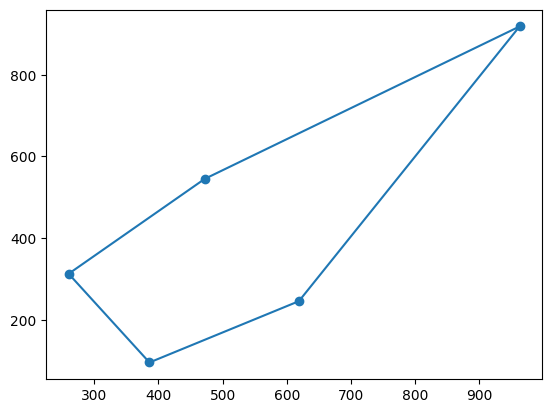

In [63]:
# TODO : create a country using the TSP class
# TODO : run the algorithm
# TODO : present the answer
tsp = TSP(5)
tour = alltours_tsp(tsp)
print(tour)
print(tsp.tour_length(tour))
tsp.plot_tour(tour)

Visualize your answer for the TSP problem

[2, 4, 1, 0, 3]
2213.8524943330303


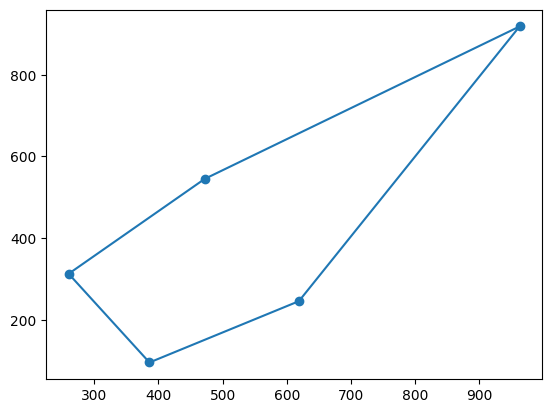

In [64]:
# TODO : plot the answer using the TSP util methods
path = solve_tsp(tsp.get_distances())
print(path)
print(tsp.tour_length(path))
tsp.plot_tour(tour)



Try this algorithm on countries with 4, 6, 8, and 10 cities and plot the time it takes to calculate the answer.

[-9.333514161912582, -6.50581905687619, -2.9472362859781076, 2.13805634728569]


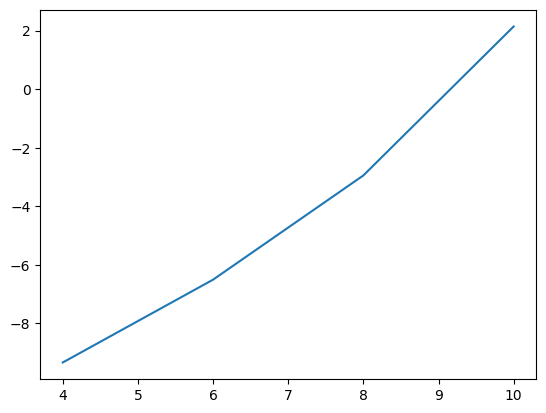

In [33]:
# TODO: create different countries
times = []
for i in range(4, 12, 2):
    tsp = TSP(i)

# TODO: run the algorithm and consider its run time
    start_time = time.perf_counter()

    alltours_tsp(tsp)

    end_time = time.perf_counter()
    runtime = end_time - start_time
    ln_time = math.log(runtime)
    times.append((i, ln_time))

# TODO: plot the run times accordingly
x_list = [p[0] for p in times]
y_list = [p[1] for p in times]
print(y_list)
plt.plot(x_list, y_list)
plt.show()
# note : you can use log(time) for better visualisation
# note : given example is using log

## local Algorithms

### Initial Functions (25 Points)

We will create some functions for our initial state and use these functions for our local algorithms later.

- random initial function: Create a feasible tour randomly.

In [34]:
def random_initial(tsp):
  # TODO : create a random tour and return tour, length
  n = tsp.num_cities
  return random.sample(range(n), n)

- nearest neighbor initial function: Start at any city; at each step, extend the tour by moving from the previous city to its nearest neighbor that has yet to be visited.

In [10]:
def nearest_neighbor_initial(tsp, start= 0):
    # TODO : create a nearest neighbor tour as above and return tour, length
    assert start < tsp.num_cities
    path = [start]
    cities = [i for i in range(tsp.num_cities)]
    cities.remove(start)
    while len(cities) != 0:
        neighbor = tsp.nearest_neighbor(path[-1], cities)[0]
        path.append(neighbor)
        cities.remove(neighbor)
    return path

- repeated nearest neighbor initial function : You can improve nearest neighbor algorithm by running it multiple times with different starting cities and using the best-generated answer.

In [11]:
def repeated_nearest_neighbor_initial(tsp, repetitions = None):
    # TODO : repeat nearest_neighbor_initial for better performance
    # note : if repetitions == None --> repetition = tsp.city_num
    if repetitions is None:
        repetitions = tsp.num_cities
    assert repetitions > 0
    assert repetitions <= tsp.num_cities
    tours = []
    for i in range(0, repetitions):
        tours.append(nearest_neighbor_initial(tsp, i))
    ans = tsp.shortest_tour(tours)
    return ans

Now, try to create a country with 30 cities, apply your repeated_nearest_neighbor_initial function with repetitions of 1, 4, 8, 12, and compare the results.

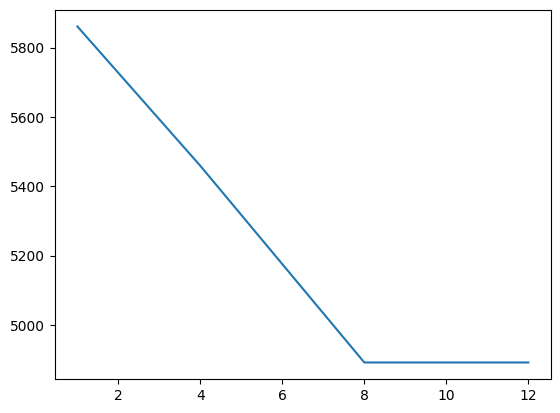

In [36]:
nums = [1, 4, 8, 12]
# TODO: create different countries
tsp = TSP(30)
path_lengs = []
for i in nums:
# TODO: run the algorithm and consider its tour length
    path = repeated_nearest_neighbor_initial(tsp, i)
    path_lengs.append(tsp.tour_length(path))
# TODO: plot/print the tour lengths accordingly
plt.plot(nums, path_lengs)
plt.show()

Does repetition make our answer optimal? "Yes! it seems like it"

- beam search initial function: Start with a list of n cities; at each step, extend your semi-tours by moving from their previous cities to their n nearest neighbors and then pick out n semi-tours from these generated semi-tours of length i+1

In [20]:
def beam_search_initial(tsp, n, iter=None):
    if iter is None:
        iter = tsp.num_cities - 1
    # TODO : initial n starting points and name it as queue
    sample = random.sample(range(tsp.num_cities), n)
    queue = [[sample[i]] for i in range(n)]
    all_cities = list(range(tsp.num_cities))
    # TODO : in every iter : (iter range could not be less than tsp.city_num)
    for i in range(iter):
        # TODO : use the queue elements to create n new elements from each (new elements contain more cities)
        paths = []
        for el in queue:
            options = [x for x in all_cities if x not in el]
            nearest = tsp.nearest_neighbor(el[-1], options, n)
            for q in nearest:
                paths.append(el + [q])

        if len(paths) < 1:
            continue

        # TODO : filter these n^2 elements and just use n of them and name them as queue
        queue = tsp.shortest_path(paths, n)


    # TODO : return tour, length of the best option in queue
    ans = tsp.shortest_tour(queue)
    return ans, tsp.tour_length(ans)

Now, try to create a country with 30 cities, apply these initial functions, and compare the tour length of these initial tours with each other and the optimal answer (if city_num is low).

In [37]:
# TODO: create a country
tsp = TSP(30)
# TODO: run the needed algorithms and consider their tour length
r_tour = random_initial(tsp)
l_r = tsp.tour_length(r_tour)
nn_tour = nearest_neighbor_initial(tsp)
l_nn = tsp.tour_length(nn_tour)
rnn_tour = repeated_nearest_neighbor_initial(tsp, 10)
l_rnn = tsp.tour_length(rnn_tour)
bs_tour, l_bs = beam_search_initial(tsp, 5, 100)
# note : repeated_nearest_neighbor_initial(tsp, 10) and beam_search_initial(tsp, 5, 100) are used in
# the example below; you are free to use other parameters.
print("random tour length: ", l_r, "\n tour: ", r_tour)
print("nearest neighbor tour length: ", l_nn, "\n tour: ", nn_tour)
print("repeated nearest neighbor tour length: ", l_rnn, "\n tour: ", rnn_tour)
print("beam search tour length: ", l_bs, "\n tour: ", bs_tour)

random tour length:  13999.36675029667 
 tour:  [15, 12, 14, 11, 3, 24, 28, 5, 23, 1, 25, 16, 26, 8, 21, 13, 6, 27, 2, 29, 0, 17, 4, 20, 19, 9, 22, 18, 7, 10]
nearest neighbor tour length:  5455.7061654435065 
 tour:  [0, 5, 22, 17, 24, 18, 26, 10, 19, 16, 13, 8, 21, 11, 6, 28, 7, 3, 4, 29, 27, 9, 12, 25, 2, 14, 23, 1, 15, 20]
repeated nearest neighbor tour length:  5188.4635166314565 
 tour:  [6, 11, 21, 8, 13, 24, 17, 22, 5, 0, 27, 4, 29, 9, 12, 18, 26, 10, 19, 16, 14, 23, 1, 15, 2, 25, 7, 28, 3, 20]
beam search tour length:  5300.717836634336 
 tour:  [25, 19, 10, 26, 18, 24, 17, 22, 5, 0, 4, 29, 27, 9, 12, 16, 13, 8, 21, 11, 6, 28, 7, 3, 20, 14, 23, 1, 15, 2]


Plot these tours and compare them visually.

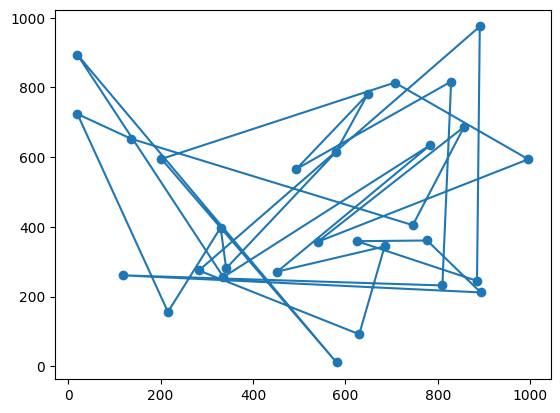

In [38]:
# TODO: plot the tours accordingly (random)
tsp.plot_tour(r_tour)

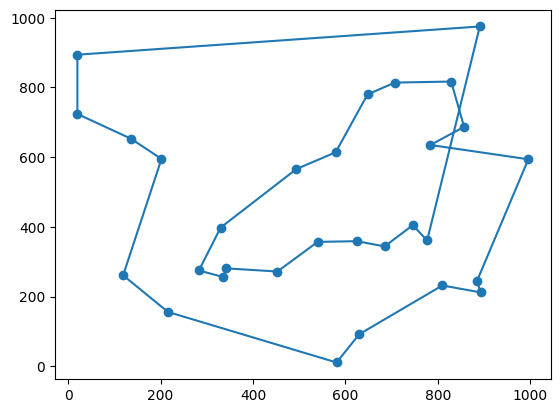

In [40]:
# TODO: plot the tours accordingly (nn)
tsp.plot_tour(nn_tour)

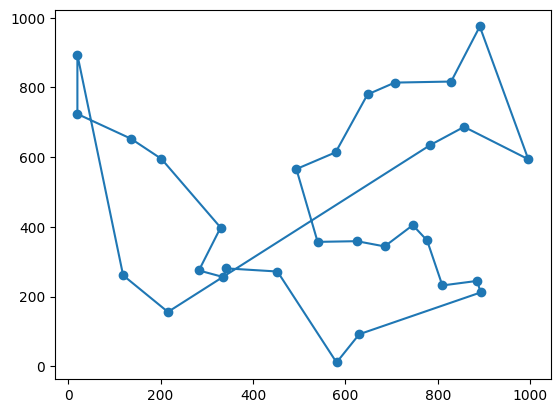

In [41]:
# TODO: plot the tours accordingly (rnn)
tsp.plot_tour(rnn_tour)

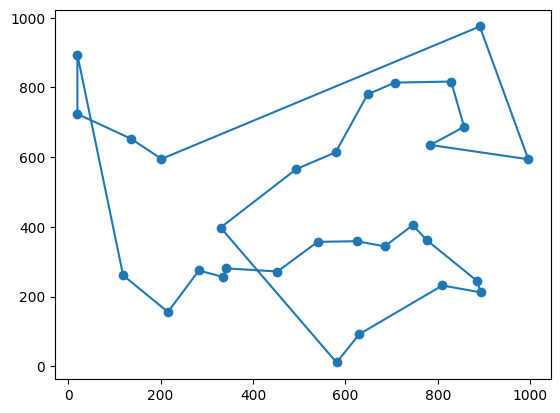

In [42]:
# TODO: plot the tours accordingly (beam)
tsp.plot_tour(bs_tour)

### LKH (25 Points)

Implement a simplified version of [LKH](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwimj7nFoqCEAxWzh_0HHc98Df4QFnoECCQQAQ&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FLin%25E2%2580%2593Kernighan_heuristic&usg=AOvVaw0G05-wkkun1YAp6zPfWuLd&opi=89978449) for this problem.</br>
- This local search algorithm takes the initial state and improves it over time by swapping a part of the tour sequence.
- In this modified version, we will check every (i,j) pair at each iteration and reverse the tour from index "I" to index "J" if it improves our tour.


In [43]:
def lin_kernighan(tsp, init, iterations=10):
    # TODO : init
    copy_in = init.copy()

    # TODO : for iteration :
    for _ in range(iterations):
        # TODO : for every distinct pair of (i, j):
        for i in range(tsp.num_cities):
            for j in range(i + 1, tsp.num_cities):
                # TODO : If the reverse technique improves our tour, replace the reversed version with the actual version.
                # note : reverse technique : a1 a2 a3 a4 ... a10 ----with i = 2,  j = 5 ----> a1 a5 a4 a3 a2 a6 .... a10
                new_tour = copy_in.copy()
                rev = new_tour[i:j]
                rev.reverse()
                new_tour = new_tour[:i] + rev + new_tour[j:]
                copy_in = tsp.shortest_tour([copy_in, new_tour])

    # TODO :  return tour, distance
    return copy_in, tsp.tour_length(copy_in)

Run this algorithm on a reasonably big country and visualize it.</br>
You can use any initial state in this part.

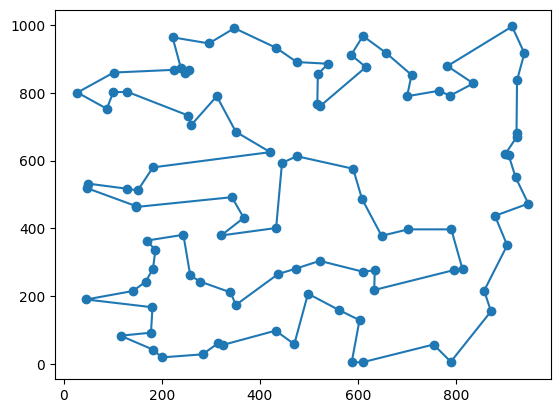

7804.731233970491


In [45]:
# TODO : create a country using the TSP class
tsp = TSP(100)
# TODO : run the algorithm
lk_tour, l_lk = lin_kernighan(tsp, random_initial(tsp))
# TODO : plot the answer
tsp.plot_tour(lk_tour)
print(l_lk)

### Simulated Annealing (25 Points)

Implement simulated annealing for this problem.

In [48]:
def return_true_with_probability(p):
    return random.random() < p

def simulated_annealing(tsp, initial, initial_temperature=1000, cooling_rate=0.99, num_iterations=10000):
    # TODO : init
    initial: list
    copy_in = initial.copy()
    temperature = initial_temperature

    # TODO : for iteration:
    for _ in range(num_iterations):
        # TODO : get a neighbor
        # note : create neighbors using the reversing method,  but this time improvement is not important
        i = random.randint(0, tsp.num_cities-1)
        j = random.randint(0, tsp.num_cities-1)
        if i > j:
            i, j = j, i
        new_tour = copy_in.copy()
        rev = new_tour[i:j]
        rev.reverse()
        new_tour = new_tour[:i] + rev + new_tour[j:]
        length = tsp.tour_length(copy_in)
        new_length = tsp.tour_length(new_tour)
        accepted = False
        # TODO : if it has a improvement, accept!
        if new_length < length:
            accepted = True

        # TODO : with the acceptance probability, accept!
        else:
            p = math.exp((length - new_length) / temperature)
            if return_true_with_probability(p):
                accepted = True

        # TODO : update tour if accepted
        if accepted:
            copy_in = new_tour

        # TODO : update temp
        temperature *= cooling_rate

    # return tour, length
    return copy_in, tsp.tour_length(copy_in)

Run this algorithm on a reasonably big country and visualize it.</br>
You can use any initial state in this part.

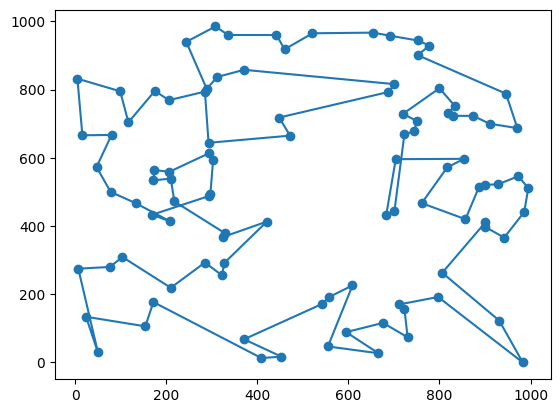

9179.833991838916


In [66]:
# TODO : create a country using the TSP class
tsp = TSP(100)
# TODO : run the algorithm
sa_tour, l_sa = simulated_annealing(tsp, random_initial(tsp))
# TODO : plot the answer
tsp.plot_tour(sa_tour)
print(l_sa)

### Analysis

- The given code can calculate an acceptable approximated answer.
- use this code to compare your algorithms.

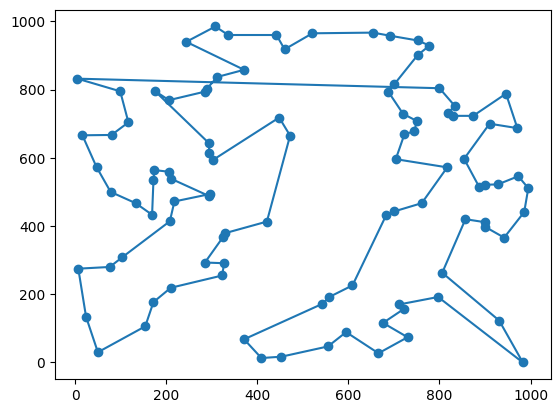

8415.208466524202


In [69]:
path = solve_tsp(tsp.get_distances())
tsp.plot_tour(path)
print(tsp.tour_length(path))

- analyze the lengths you get from the two algorithms with different initial functions
- plot these tours and explain the results (results may be inconsistent as they are approximations)

In [72]:
# TODO: test different initial functions on your two algorithms using the same TSP problem
tsp = TSP(50)
path_lkh_rand, lkh_rand = lin_kernighan(tsp, random_initial(tsp))
path_lkh_nn, lkh_nn = lin_kernighan(tsp, nearest_neighbor_initial(tsp))
path_lkh_rnn, lkh_rnn = lin_kernighan(tsp, repeated_nearest_neighbor_initial(tsp, 10))
path_lkh_bs, lkh_bs = lin_kernighan(tsp, beam_search_initial(tsp, 5, 100)[0])
path_sa_rand, sa_rand = simulated_annealing(tsp, random_initial(tsp))
path_sa_nn, sa_nn = simulated_annealing(tsp, nearest_neighbor_initial(tsp))
path_sa_rnn, sa_rnn = simulated_annealing(tsp, repeated_nearest_neighbor_initial(tsp, 10))
path_sa_bs, sa_bs = simulated_annealing(tsp, beam_search_initial(tsp, 5, 100)[0])
# TODO: also create an answer using the given library
path_ans = solve_tsp(tsp.get_distances())
ans = tsp.tour_length(path_ans)
# TODO: compare these answers numerically and visually
# note : The value of the given code (threshold) is not a hard threshold!
# note : Don't forget to compare different answers by plotting; you may need to remake a plotting function
print("threshold : ", ans)
print("lkh random : ", lkh_rand)
print("lkh nn :  ", lkh_nn)
print("lkh rnn :  ", lkh_rnn)
print("lkh beam :  ", lkh_bs)
print("simulated random :  ", sa_rand)
print("simulated nn :  ", sa_nn)
print("simulated rnn :  ", sa_rnn)
print("simulated beam :  ", sa_bs)

threshold :  7012.815804635823
lkh random :  6503.471129686506
lkh nn :   6763.142515712047
lkh rnn :   6493.003392892985
lkh beam :   6239.656809968541
simulated random :   6464.304894105239
simulated nn :   6746.701732261523
simulated rnn :   6436.272831946528
simulated beam :   6536.839644654476


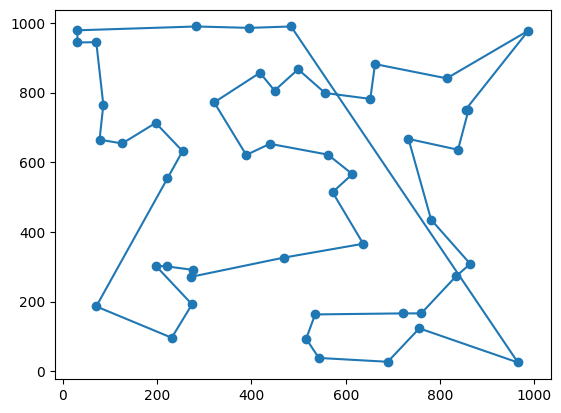

In [73]:
tsp.plot_tour(path_ans)

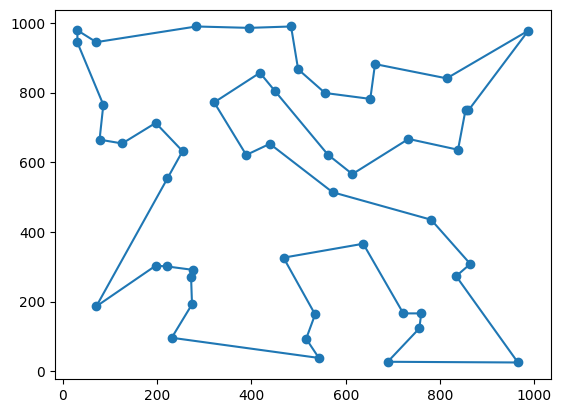

In [74]:
tsp.plot_tour(path_lkh_rand)

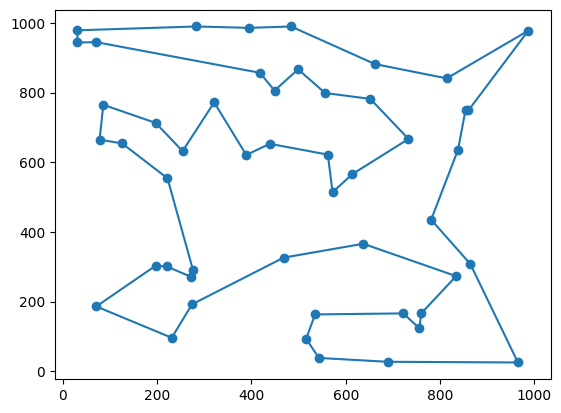

In [75]:
tsp.plot_tour(path_lkh_nn)

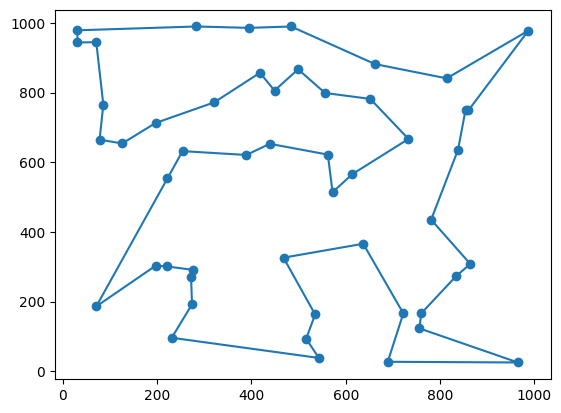

In [76]:
tsp.plot_tour(path_lkh_rnn)

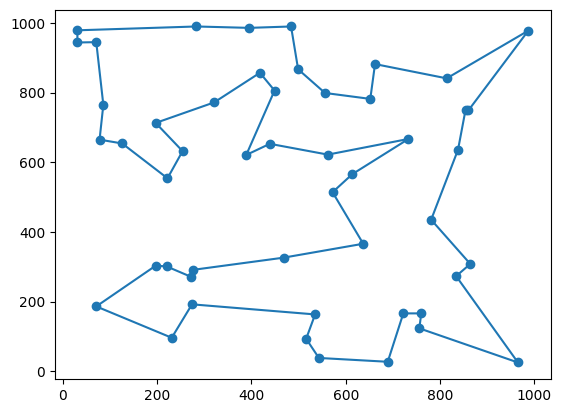

In [77]:
tsp.plot_tour(path_lkh_bs)

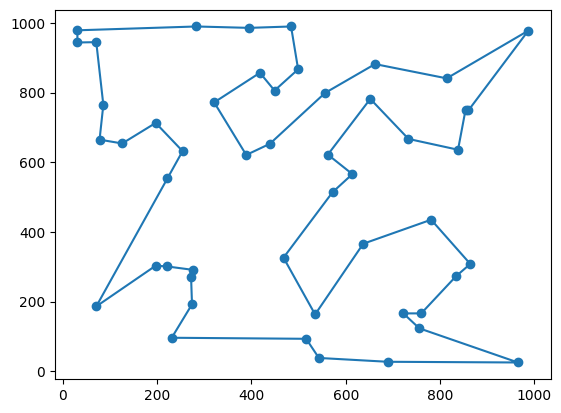

In [78]:
tsp.plot_tour(path_sa_rand)

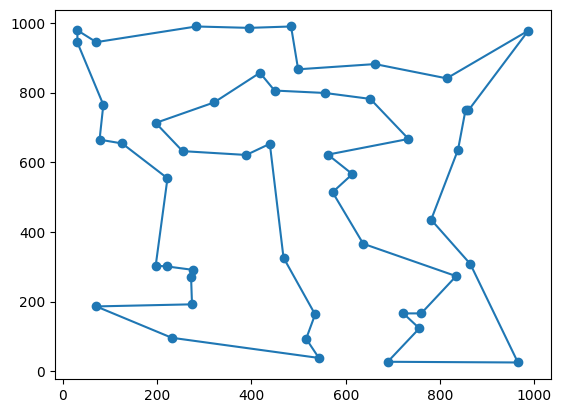

In [79]:
tsp.plot_tour(path_sa_nn)

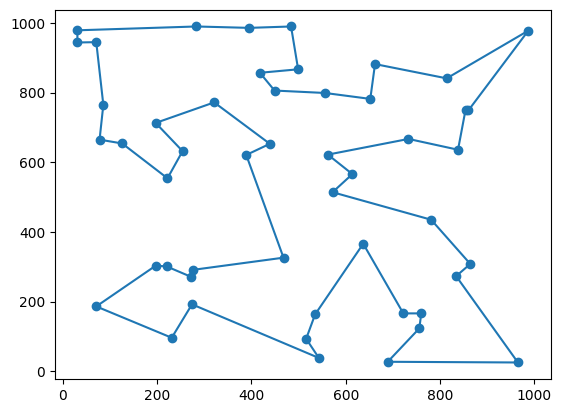

In [80]:
tsp.plot_tour(path_sa_rnn)

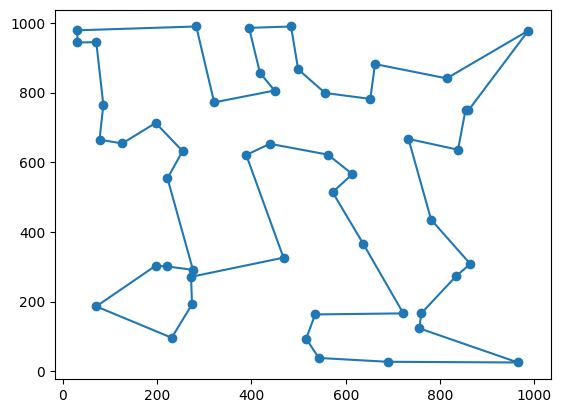

In [81]:
tsp.plot_tour(path_sa_bs)